### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


### Loading File

In [2]:
df = pd.read_csv(r'C:\Users\chira\Downloads\advertising.csv')

### Analysing data

In [3]:
dfc = df.copy()

In [4]:
dfc

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
dfc.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
dfc.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
corr_matrix= dfc.corr().round(2)
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


<AxesSubplot:>

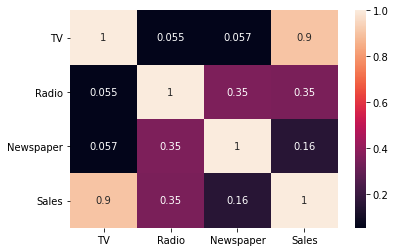

In [8]:
sns.heatmap(dfc.corr(),annot=True)

Tv and sales are highly correlated.

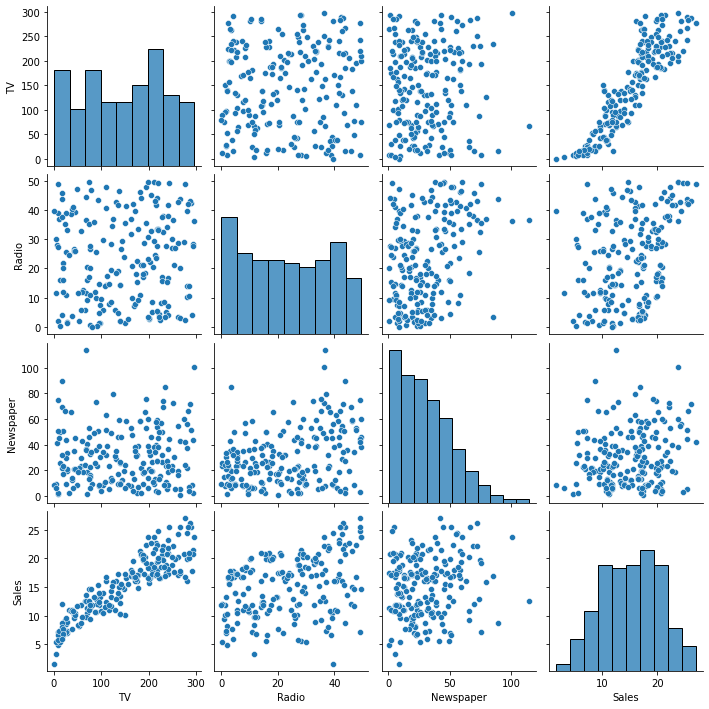

In [9]:
#gives histogram and scatterplot of each columns
sns.pairplot(dfc)

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

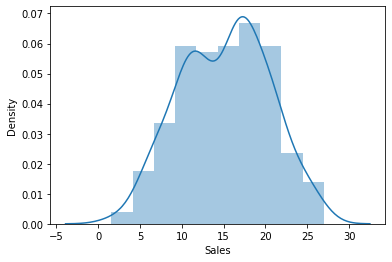

In [10]:
sns.distplot(dfc['Sales'])

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

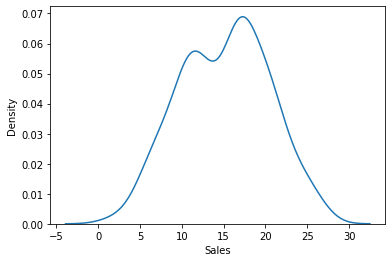

In [11]:
sns.distplot(dfc['Sales'],hist=False)

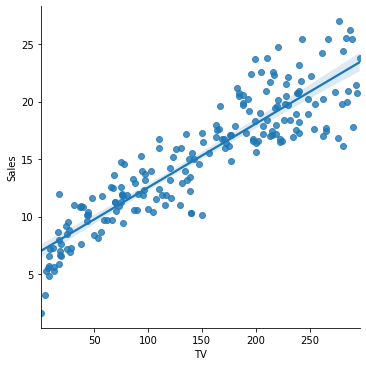

In [12]:
sns.lmplot(x='TV',y='Sales', data = dfc)


In [13]:
y = dfc['Sales']
x = dfc[['TV','Newspaper','Radio']]

In [14]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

### Training the model

In [61]:
from sklearn.linear_model import LinearRegression

### creating an instance of linear regression model say im

In [62]:
im = LinearRegression()

In [63]:
im.fit(x_train,y_train)

LinearRegression()

In [64]:
im.coef_

array([ 0.05493018, -0.00619422,  0.1095576 ])

### Predicting Test Data

In [65]:
predictions = im.predict(x_test)

Text(0, 0.5, 'predicted values')

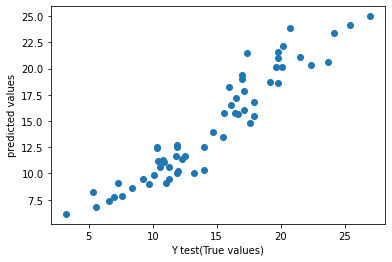

In [66]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test(True values)')
plt.ylabel('predicted values')

### Evaluating the model

In [67]:
from sklearn import metrics

In [68]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 1.373120069836785
MSE 2.8685706338964962
RMSE 1.6936855180040054


In [69]:
metrics.explained_variance_score(y_test,predictions)

0.8973292177094782

### Residuals

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

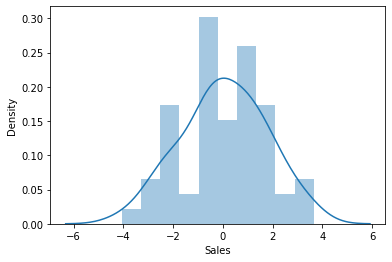

In [70]:
sns.distplot(y_test-predictions,bins=10)

Inference:
This is more likely Normal Distribution.

In [71]:
def get_bias(predicted_values,true_values):
    return np.round(np.mean((predicted_values - true_values)**2),0)
bias = get_bias(predictions,y_test)
print('Bias:',bias)

Bias: 3.0


In [72]:
variance = np.round(np.var(predictions),0)
print('Variance:',variance)

Variance: 26.0


In [73]:
print('R2 Score:', metrics.r2_score(y_test, predictions))

R2 Score: 0.8972649704616219


In [74]:
im.score(x_test,predictions)

1.0